# ***Desafío 3: Churn-Modeling***


*El objetivo de este Desafío es probar al menos 3 modelos diferentes de clasifición en un problema a elegir y luego realizar una aveluación de modelos para seleccionar el mejor. En este trabajo elegimos un conjunto de datos Churn-Modeling y los modelos a probar son: KNN, regresión logística y Naive Bayes*

---

***Integrantes:*** 
* *Sebastián Alvarez Brandon* 
* *Natalia Murat*
* *Juan Mutis*
* *Diana Garcés*
* *Josue Henao* 


## **Descripción del data set**
En este desafío vamos a trabajar con el conjunto de datos Churn-Modeling. Este conjunto de datos contiene detalles de los clientes de un banco y la variable objetivo es una variable binaria que refleja el hecho de si el cliente dejó el banco (cerró su cuenta) o si continúa siendo un cliente. 

Las características capturan información sociodemográfica del cliente, información de productos financieros, el comportamiento y balance de su cuenta. Las características son las siguientes:

* **CustomerId**: Id único para identificar el cliente.
* **Surname**: Apellido del cliente.
* **CreditScore**: Puntaje de crédito del cliente.
* **Geography**: País al que pertenece el cliente.
* **Gender**: Genero.
* **Age**: Edad.
* **Tenure**: Número de años que el cliente ha estado en el banco.
* **Balance**: Saldo bancario del cliente.
* **NumOfProducts**: Número de productos bancarios que utiliza el cliente.
* **HasCrCard**: Si el cliente tiene tarjeta de crédito con el banco.
* **IsActiveMember**: Si el cliente es miembro activo del banco o no.
* **EstimatedSalary**: Salario estimado en dólares.
* **Exited**: 1-Si el cliente cerró la cuenta con el banco; 0-Si el cliente es retenido. 

<a id="contenido"></a> 
## **Tabla de Contenido** 
Este trabajo se divide en 5 partes:

1. [Análisis exploratorio de datos.](#section_exploración_de_datos)
    
    Variables    
    
    a. [CreditScore.](#creditscore)
    b. [Geography.](#geography)
    c. [Gender.](#gender)
    d. [Age.](#age)
    e. [Tenure.](#tenure)
    f. [Balance.](#balance)
    
2. [Preparación del data set.](#section_dummies)
3. [Prueba de modelos.](#section_Prueba_de_modelos)
4. [Evaluación de los modelos.](#section_Evaluacion_de_modelos) 
5. [Conclusiones](#section_Conclusiones)


<a id="section_exploración_de_datos"></a>

## 1. Análisis exploratorio de datos

Comenzamos cargando las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
#import plotnine

from sklearn import linear_model
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from plotnine import *


%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


Leemos los datos y vemos la cantidad de registros. Se cuenta con un archivo de datos con 10.000 registros de clientes y 13 características medidas

In [2]:
data = pd.read_csv("/content/drive/MyDrive/churn-modeling.csv", sep = ',')
data.shape

(10000, 13)

In [3]:
data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


Identificamos la cantidad de nulos por columnas. Al ver es que estos representan menos del 0,2% y que sólo hay faltantes en las columnas Geography y EstimatedSalary, decidimos eliminarlos. Se obtuvo un archivo de datos de 9.968 registros.

In [4]:
print("Porcentaje de nulos por columna\n",data.isnull().mean()*100,"\n")
data_sin_nulos=data.dropna(subset=['Geography'])
data_sin_nulos=data_sin_nulos.dropna(subset=['EstimatedSalary'])
print("Porcentaje de nulos por columna luego de eliminar los registros faltantes\n",data_sin_nulos.isnull().mean()*100)
print(data_sin_nulos.shape)

Porcentaje de nulos por columna
 CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.20
Gender             0.00
Age                0.00
Tenure             0.00
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.12
Exited             0.00
dtype: float64 

Porcentaje de nulos por columna luego de eliminar los registros faltantes
 CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64
(9968, 13)


De análisis exploratorio de Exited vemos que de los 9.968 clientes, el 20.37% cerró la cuenta en el banco

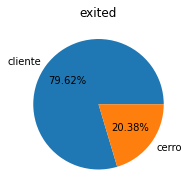

In [5]:
100*(data_sin_nulos.Exited.value_counts()/data_sin_nulos.shape[0])
exited = 100*(data_sin_nulos.Exited.value_counts()/data_sin_nulos.shape[0])
valores = (exited) # serie de numeros
grupos = ['cliente', 'cerro'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("exited")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()

<a id="creditscore"></a>
### Análisis exploratorio CreditScore

[Volver a tabla de contenido](#contenido)

#### Resumen

In [6]:
print(data_sin_nulos.CreditScore.describe())

count    9968.000000
mean      650.654996
std        96.565875
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64


#### Histograma

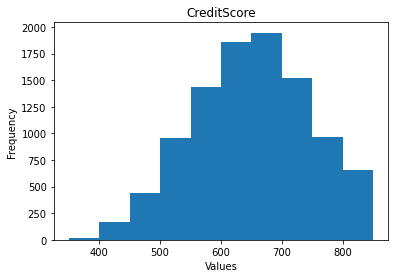

In [7]:
n, bins, patches=plt.hist(data_sin_nulos.CreditScore)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("CreditScore")
plt.show()

#### CreditScore vs Exited

In [8]:
data.groupby('Exited')[('CreditScore')].describe()
# El puntaje de crédito del 50% de los clientes tiene un valor de 652 o menos, con un valor mínimo de 350 y máximo de 850.
# Gráficamente, el puntaje de crédito según si la persona cerró o no la cuenta con el banco no presenta diferencias notorias.

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


#### Boxplot

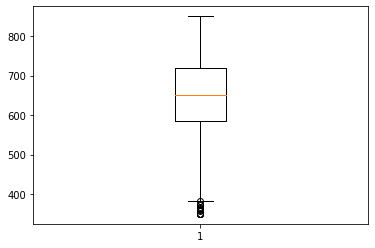

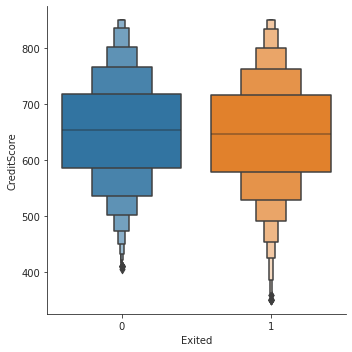

In [9]:
plt.boxplot(data_sin_nulos.CreditScore)
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = 'Exited', y = "CreditScore", data=data, kind="boxen")
    g.set_axis_labels("Exited", "CreditScore");

<a id="geography"></a>
### Análisis exploratorio Geography

[Volver a tabla de contenido](#contenido)

Resumen

France     50.200642
Germany    25.060193
Spain      24.739165
Name: Geography, dtype: float64


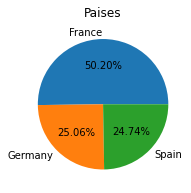

In [10]:
print(100*(data_sin_nulos.Geography.value_counts()/data_sin_nulos.shape[0]))
# n, bins, patches=plt.hist(data_sin_nulos.Geography)

# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Histogram")
# plt.show()
paises = 100*(data_sin_nulos.Geography.value_counts()/data_sin_nulos.shape[0])
valores = (paises) # serie de numeros
grupos = ['France','Germany','Spain'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("Paises")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()

<a id="gender"></a>
### Análisis exploratorio Género

[Volver a tabla de contenido](#contenido)

#### Resumen

Male      54.604735
Female    45.395265
Name: Gender, dtype: float64


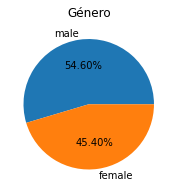

In [11]:
print(100*(data_sin_nulos.Gender.value_counts()/data_sin_nulos.shape[0]))
# n, bins, patches=plt.hist(data_sin_nulos.Gender)
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.title("Histogram")
# plt.show()
sexo = 100*(data_sin_nulos.Gender.value_counts()/data_sin_nulos.shape[0])
valores = (sexo) # serie de numeros
grupos = ['male','female'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("Género")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()

#### Genero vs Exited

In [12]:
pd.crosstab(index=data_sin_nulos['Exited'],
            columns=data_sin_nulos['Gender'], margins=True,normalize='index')

#El 54,60% de los clientes son hombres y el 45,71% son mujeres.
# El 55,88% de los clientes que cierran la cuenta son mujeres y el 44,12% son hombres. 

Gender,Female,Male
Exited,,
0,0.427114,0.572886
1,0.558838,0.441162
All,0.453953,0.546047


<a id="age"></a>
### Análisis exploratorio Edad

[Volver a tabla de contenido](#contenido)

#### Resumen

count    9968.000000
mean       38.921549
std        10.488426
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64


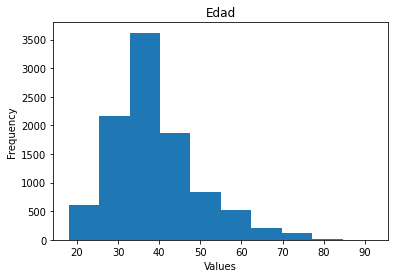

In [13]:
print(data_sin_nulos.Age.describe())
n, bins, patches=plt.hist(data_sin_nulos.Age)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Edad")
plt.show()

#### Edad vs Exited

In [14]:
data.groupby('Exited')[('Age')].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


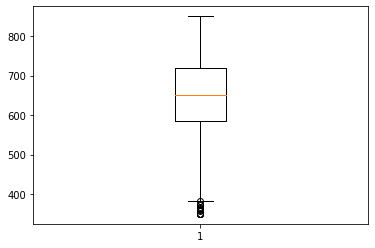

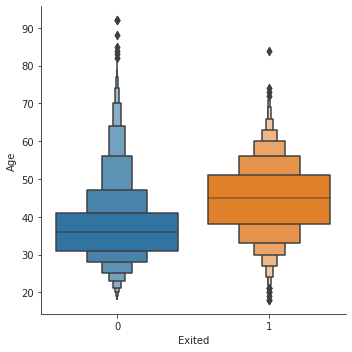

In [15]:
# La edad del 50% de los clientes tiene un valor de 37 años o menos, con un valor mínimo de 18 y máximo de 92.
# Gráficamente, la edad en aquellos que cerraron la cuenta en el banco es mayor que las que no. 
plt.boxplot(data_sin_nulos.CreditScore)
#Análisis exploratorio CreditScore vs Exited
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = 'Exited', y = "Age", data=data, kind="boxen")
    g.set_axis_labels("Exited", "Age");
    

<a id="tenure"></a>
### Análisis exploratorio Tenure

[Volver a tabla de contenido](#contenido)

#### Resumen

count    9968.000000
mean        5.013844
std         2.892233
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64


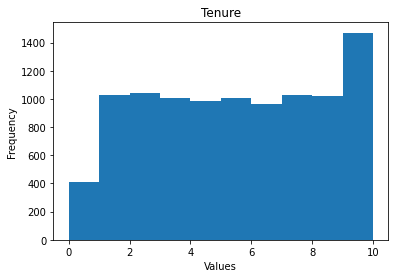

In [16]:
print(data_sin_nulos.Tenure.describe())
n, bins, patches=plt.hist(data_sin_nulos.Tenure)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Tenure")
plt.show()

#### Tenure vs Exited

In [17]:
data.groupby('Exited')[('Tenure')].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,5.033279,2.880658,0.0,3.0,5.0,7.0,10.0
1,2037.0,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0


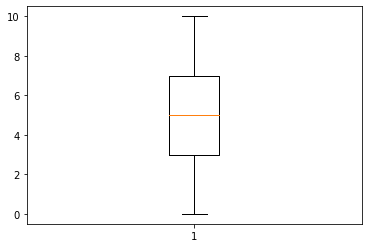

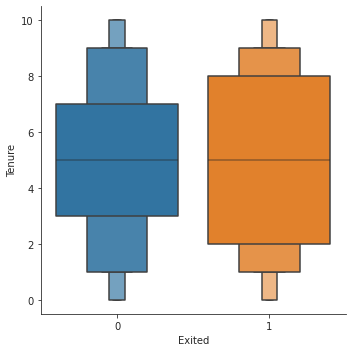

In [18]:
# El tiempo de antiguedad del 50% de los clientes tiene un valor de 5 años o menos, con un valor mínimo de 0 años y máximo de 10.
# Gráficamente, no se observa diferencias notorias en el tiempo de antiguedad entre aquellos que cierran o no la cuenta con el banco.
plt.boxplot(data_sin_nulos.Tenure)
# Análisis exploratorio Tenure vs Exited
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = 'Exited', y = "Tenure", data=data, kind="boxen")
    g.set_axis_labels("Exited", "Tenure");

<a id="balance"></a>
### Análisis exploratorio Balance

[Volver a tabla de contenido](#contenido)

#### Resumen

count      9968.000000
mean      76492.320741
std       62413.369149
min           0.000000
25%           0.000000
50%       97198.540000
75%      127665.115000
max      250898.090000
Name: Balance, dtype: float64


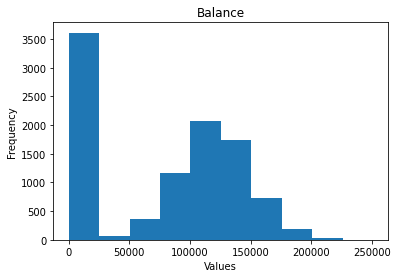

In [19]:
print(data_sin_nulos.Balance.describe())

#Histograma
n, bins, patches=plt.hist(data_sin_nulos.Balance)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Balance")
plt.show()


#### Balance vs Exited

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


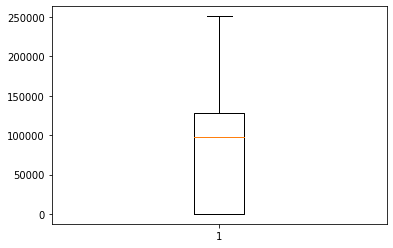

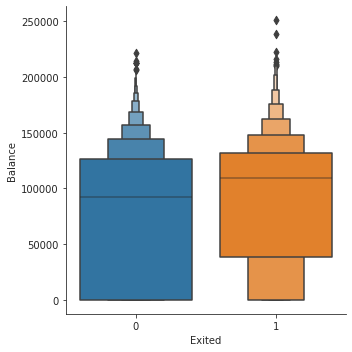

In [20]:
# Análisis exploratorio Balance vs Exited
plt.boxplot(data_sin_nulos.Balance)
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = 'Exited', y = "Balance", data=data, kind="boxen")
    g.set_axis_labels("Exited", "Balance");
    
data.groupby('Exited')[('Balance')].describe()

# El saldo bancario del 50% de los clientes tiene un valor de 97.198 unidades o menos, con un valor mínimo de 0 y máximo de 250898.
# Se puede observar que el saldo bancario de aquellos que cierran la cuenta es mayor que el de los que no.

### Análisis exploratorio NumOfProducts

[Volver a tabla de contenido](#contenido)

#### Resumen

1    50.852729
2    45.896870
3     2.658507
4     0.591894
Name: NumOfProducts, dtype: float64


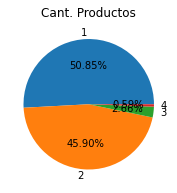

In [21]:
print(100*(data_sin_nulos.NumOfProducts.value_counts()/data_sin_nulos.shape[0]))

productos = 100*(data_sin_nulos.NumOfProducts.value_counts()/data_sin_nulos.shape[0])
valores = (productos) # serie de numeros
grupos = ['1','2','3','4'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("Cant. Productos")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()






#### NumOfProducts vs Exited

In [22]:
pd.crosstab(index=data_sin_nulos['Exited'],
            columns=data_sin_nulos['NumOfProducts'], margins=True,normalize='index')

#El 50,85% de los clientes tienen un solo producto bancario, 45,89% tienen dos, el 2,66% tienen 3 y el 0,60% cuatro productos.
# El 69,22% de los clientes que cierran la cuenta tienen un solo producto bancario. 

NumOfProducts,1,2,3,4
Exited,,,,
0,0.461509,0.532695,0.005796,0.000000
1,0.692270,0.170852,0.107829,0.029050
All,0.508527,0.458969,0.026585,0.005919


### Análisis exploratorio HasCrCard

[Volver a tabla de contenido](#contenido)

#### Resumen

Yes    70.545746
No     29.454254
Name: HasCrCard, dtype: float64


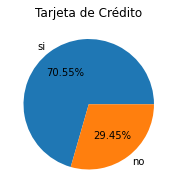

In [23]:
print(100*(data_sin_nulos.HasCrCard.value_counts()/data_sin_nulos.shape[0]))

credito = 100*(data_sin_nulos.HasCrCard.value_counts()/data_sin_nulos.shape[0])
valores = (credito) # serie de numeros
grupos = ['si','no'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("Tarjeta de Crédito")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()

#### HasCrCard vs Exited

In [24]:
pd.crosstab(index=data_sin_nulos['Exited'],
            columns=data_sin_nulos['HasCrCard'], margins=True,normalize='index')

# El 70,54% de los clientes tienen tarjeta de crédito con el banco. 
# El 69,86% de los clientes que cierran la cuenta tienen tienen tarjeta de crédito con el banco. 

HasCrCard,No,Yes
Exited,,
0,0.292806,0.707194
1,0.301329,0.698671
All,0.294543,0.705457


### Análisis exploratorio IsActiveMember

[Volver a tabla de contenido](#contenido)

#### Resumen

Yes    51.504815
No     48.495185
Name: IsActiveMember, dtype: float64


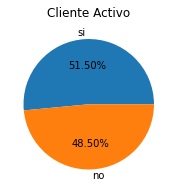

In [25]:
print(100*(data_sin_nulos.IsActiveMember.value_counts()/data_sin_nulos.shape[0]))
activo = 100*(data_sin_nulos.IsActiveMember.value_counts()/data_sin_nulos.shape[0])
valores = (activo) # serie de numeros
grupos = ['si','no'] # labels para cada numero

fig = plt.figure(figsize=(5,3))
ax = plt.axes()
plt.title("Cliente Activo")
ax.pie(valores, labels = grupos ,autopct='%1.2f%%')
plt.show()

#### IsActiveMember vs Exited

In [26]:
pd.crosstab(index=data_sin_nulos['Exited'],
            columns=data_sin_nulos['IsActiveMember'], margins=True,normalize='index')

# El 51,50% de los clientes son miembros activos. 
# El 63,90% de los clientes que cierran la cuenta no son miembros activos.

IsActiveMember,No,Yes
Exited,,
0,0.445508,0.554492
1,0.639094,0.360906
All,0.484952,0.515048


### Análisis exploratorio EstimatedSalary

[Volver a tabla de contenido](#contenido)

#### Resumen

count      9968.000000
mean     100057.118151
std       57506.202430
min          11.580000
25%       50910.677500
50%      100168.240000
75%      149369.790000
max      199992.480000
Name: EstimatedSalary, dtype: float64


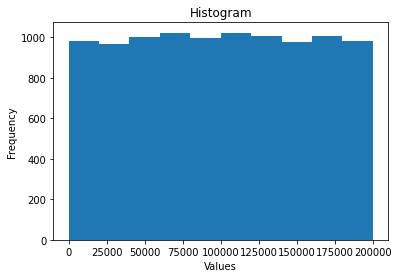

In [27]:
print(data_sin_nulos.EstimatedSalary.describe())
n, bins, patches=plt.hist(data_sin_nulos.EstimatedSalary)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

#### EstimatedSalary vs Exited

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7953.0,99706.462598,57411.842970,90.07,50771.160,99595.67,148608.390,199992.48
1,2035.0,101475.570550,57933.394711,11.58,51889.835,102460.84,152436.875,199808.10


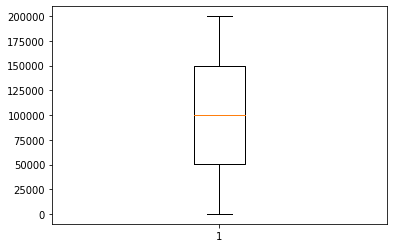

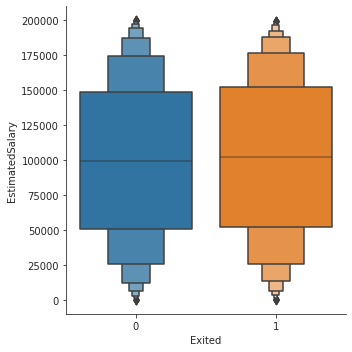

In [28]:
#Boxplot
plt.boxplot(data_sin_nulos.EstimatedSalary)

# Análisis exploratorio CreditScore vs Exited
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = 'Exited', y = "EstimatedSalary", data=data, kind="boxen")
    g.set_axis_labels("Exited", "EstimatedSalary");
    
data.groupby('Exited')[('EstimatedSalary')].describe()

# El salario estimado del 50% de los clientes tiene un valor de 100.168 unidades o menos, con un valor mínimo de 11,58 y máximo de 199.992.
# Se puede observar que el salario estimado de aquellos que cierran la cuenta no difiere de aquellos que no la cierran.

#### Correlación de las variables independientes con la variable dependiente

Text(0.5, 1.0, 'Correlación entre variable objetivo y features')

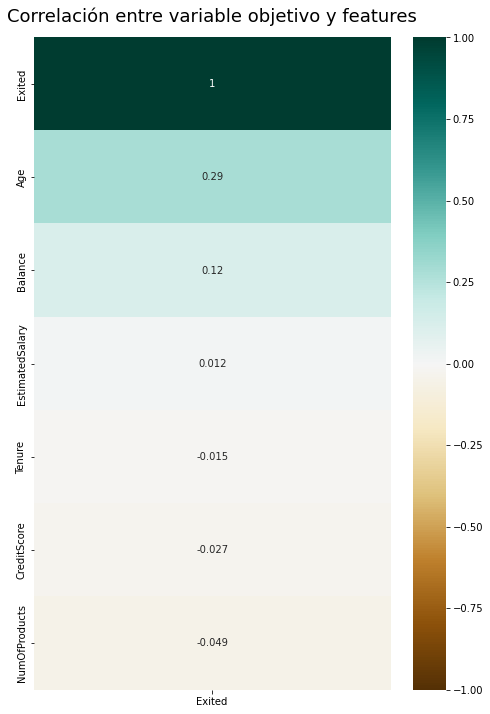

In [29]:
xy_vars = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']
df_vars = data_sin_nulos.loc[:,xy_vars]
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(df_vars.corr()[['Exited']].sort_values(by='Exited',ascending=False),
                                                            vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title("Correlación entre variable objetivo y features",
                 fontdict={'fontsize':18},pad=16)

Podemos observar que la variable objetivo 'Exited' presenta la correlación más alta, de 0.29, con la variable explicativa de Age, y en segundo lugar con Balance, siendo 0.12 el valor de la correlación.

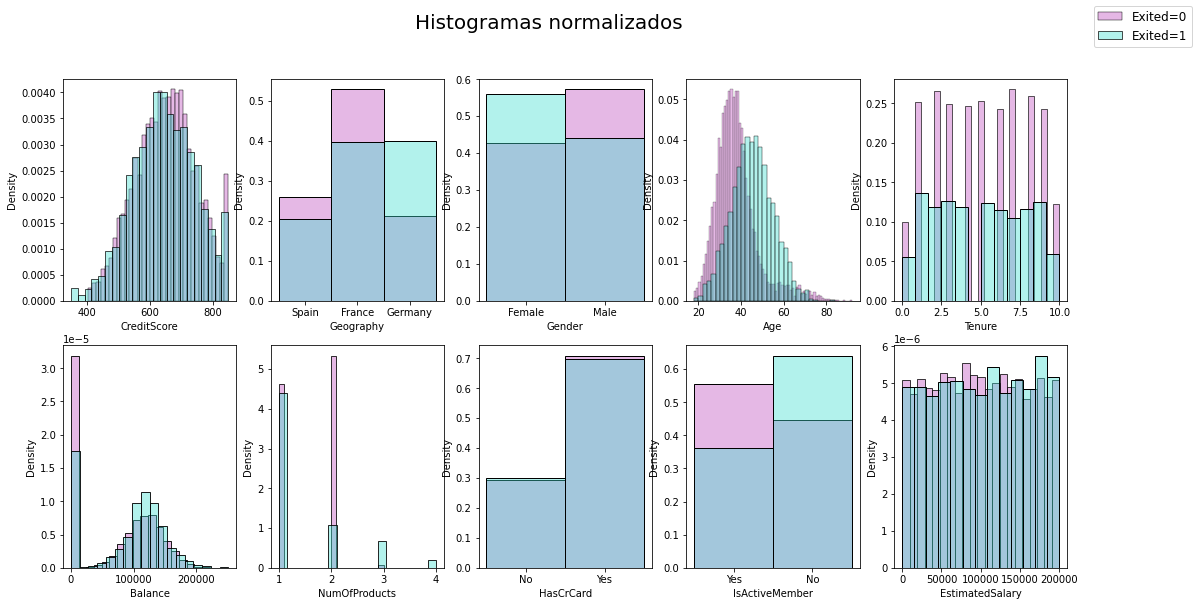

In [30]:
# Histogramas normalizados
fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(18,9))
fig.suptitle("Histogramas normalizados",fontsize=20)
for c, ax in zip(df_vars.columns[:-1],axes.flatten()):
    sns.histplot(data = df_vars.loc[df_vars["Exited"]==0,c],stat='density',ax=ax,kde=False,color='plum')
    sns.histplot(data=df_vars.loc[df_vars["Exited"]==1,c],stat='density',ax=ax,kde=False,color='turquoise',alpha=0.4)
fig.legend(['Exited=0','Exited=1'], prop={'size':12})

Podemos observar que las variables Age y Balance son las que más claramente separan los casos de clientes que se van frente a los que no. De acuerdo a Age vemos que la mayoría de los clientes que tienden a quedarse están entre los 30-40 años, y que la mayoría de los clientes que tienden a irse están entre los 50-60. Según el Balance, los clientes tienden a quedarse cuando la variable posee valores cercanos a 0. En comparación a los otros países, Francia tiene una proporción más alta de clientes que permanecen. Las mujeres abandonan el banco en una proporción mayor que los hombres.

<a id="section_dummies"></a>
## 2. Preparación del data set

[Volver a tabla de contenido](#contenido)

Generamos variables dummies a partir de las variables categóricas 'Geography' y 'Gender'.

In [31]:
dummies = pd.get_dummies(data_sin_nulos[['Geography', 'Gender', "HasCrCard", "IsActiveMember"]], drop_first = True)
dummies

,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,0,0,0,1,1
1,0,1,0,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,1,0,1,1
...,...,...,...,...,...
9995,0,0,1,1,0
9996,0,0,1,1,1
9997,0,0,0,0,1
9998,1,0,1,1,0


In [32]:
data_sin_nulos

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,Yes,No,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,No,Yes,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52,1


Nos generamos entonces un data set que contenga a las variables dummies y que no contenga las columnas que no vamos a utilizar en los modelos ('CustomerId', 'Surname', 'Geography' y'Gender').

In [33]:
data_final = pd.concat([data_sin_nulos, dummies], axis = 1)
data_final.drop(['CustomerId', 'Surname', 'Geography', 'Gender', "HasCrCard", "IsActiveMember"], axis = 1, inplace = True)
data_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42,2,0.00,1,101348.88,1,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,0,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,0,0,1,1,1
9997,709,36,7,0.00,1,42085.58,1,0,0,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,1,0,1,1,0


In [34]:
X = data_final.drop(['Exited'], axis=1)
y = data_final['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 666)

# regularización y estandarización de X
scaler = StandardScaler()
#scaler.fit(X_train)
#scaler.fit(X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
data_final["Exited"].value_counts(normalize = True)

0    0.796248
1    0.203752
Name: Exited, dtype: float64

In [36]:
def _plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix
    import itertools
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    #fmt = '4d' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black")

    plt.ylabel('True Class', fontsize = 14)
    plt.xlabel('Predicted Class', fontsize = 14)

    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()

def _threshold_finder(model, X, y_true):
    """
    a function to find the optimal threshold for binary classification
    model: a trained model object (such as xgboost, glmnet, ...)
    X: the test set of features (pandas dataframe or numpy array)
    y_true: the true class labels (list or array of 0's and 1's)    
    """
    
    y_predict_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true, y_predict_proba)
    auc = roc_auc_score(y_true, y_predict_proba)
    precision, recall, thresholds2 = precision_recall_curve(y_true, y_predict_proba)
    
    class_names = [0, 1]
    youden_idx = np.argmax(np.abs(tpr - fpr))
    youden_threshold = thresholds[youden_idx]
    y_pred_youden = (y_predict_proba > youden_threshold).astype(int)
    cnf_matrix = confusion_matrix(y_true, y_pred_youden)
    np.set_printoptions(precision=2)
    
    f1 = []
    for i in range(len(precision)):
        f1.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
        
    queue_rate = []
    for thr in thresholds2:
        queue_rate.append((y_predict_proba >= thr).mean()) 

    plt.figure(figsize = (10, 5))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color = "red", label = F"AUC = {auc:.3f}")
    plt.plot(fpr[youden_idx], tpr[youden_idx], marker = "o", color = "navy", ms =10, label =F"Youden Threshold = {youden_threshold:.2f}" )
    plt.axvline(x = fpr[youden_idx], ymin = fpr[youden_idx], ymax = tpr[youden_idx], color = "navy", ls = "--")
    plt.plot([0,1], [0,1] , color = "black", ls = "--")
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('1 - Specificity' , fontsize=12)
    plt.ylabel('Sensitivity' , fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend( prop={'size':12} , loc = 4)

    plt.subplot(1,2,2)
    _plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, cmap=plt.cm.Reds, title = F"Youden Threshold = {youden_threshold:.2f}\nAccuracy = {accuracy_score(y_true, y_pred_youden)*100:.2f}%")
    plt.show()
    
    plt.figure(figsize = (12, 5))
    plt.subplot(1,2,1)
    plt.plot(thresholds, 1-fpr, label = "1 - Specificity")
    plt.plot(thresholds, tpr, label = "Sensitivity")
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds[np.argmin(abs(tpr + fpr - 1))]+0.2])
    plt.axvline(thresholds[np.argmin(abs(tpr + fpr - 1))], color="k", ls = "--")
    plt.title(F"Threshold = {thresholds[np.argmin(abs(tpr + fpr - 1))]:.3f}", fontsize = 12)
    
    plt.subplot(1,2,2)
    plt.plot(thresholds2, precision[1:], label = "Precision")
    plt.plot(thresholds2, recall[1:], label = "Recall")
    plt.plot(thresholds2, f1[1:], label = "F1-Score")
    plt.plot(thresholds2, queue_rate, label = "Queue Rate")
    plt.legend(loc = 0)
    plt.xlim([0.025, thresholds2[np.argmin(abs(precision-recall))] + 0.2])
    plt.xlabel("Threshold", fontsize = 12)
    plt.ylabel("Score", fontsize = 12)
    plt.axvline(thresholds2[np.argmin(abs(precision-recall))], color="k", ls = "--")
    plt.title(label = F"Threshold = {thresholds2[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
    plt.show()

<a id="section_Prueba_de_modelos"></a>
## 3. Prueba de modelos

[Volver a tabla de contenido](#contenido)

### KNN

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train, y_train)

accuracy_score(y_train, knn.predict(X_train))

0.8151417870518994

In [39]:
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

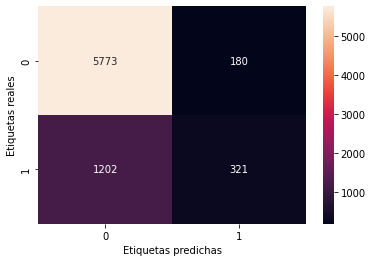

In [40]:
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

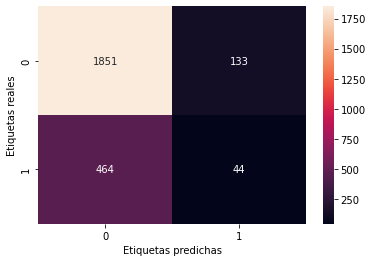

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [42]:
def getScoresKnn(X, y, start,stop,step):
    scores = []
    
    for i in range(start,stop,step):
        model = KNeighborsClassifier(n_neighbors=i)
        kf = KFold(n_splits=20, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        scores.append(dict_row_score)
    
    df_scores = pd.DataFrame(scores)
    
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    return df_scores

In [43]:
df_scores= getScoresKnn(X_train_scaled, y_train, 1, 21, 1)

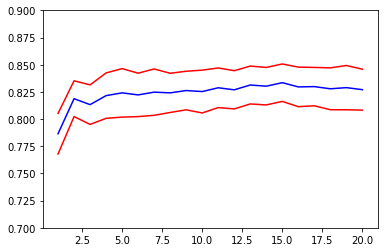

In [44]:
# Visualizamos los resultados

plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.7, 0.9);

In [45]:
# Identificamos el score máximo
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
14,0.833473,0.017217,15,0.816256,0.85069


In [46]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

15

In [47]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model_knn.fit(X_train_scaled, y_train)

accuracy_score(y_train, model_knn.predict(X_train))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6864633493846977

In [48]:
y_pred = model_knn.predict(X_test_scaled)

In [49]:
accuracy_score(y_test, y_pred)

0.8374799357945425

In [50]:
y_train_pred = model_knn.predict(X_train_scaled)

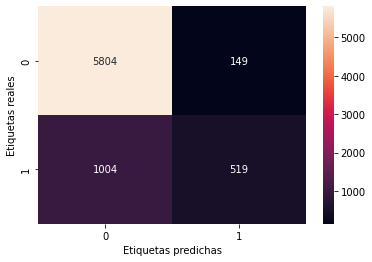

In [51]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

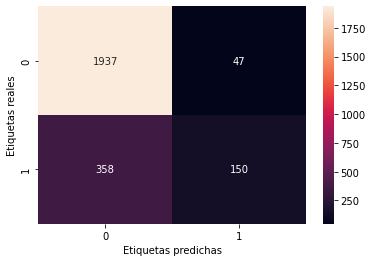

In [52]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [53]:
# Accuracy de modelo con set de prueba
print('Accuracy en el set de Test: {:.2f}'
     .format(round(accuracy_score(y_test, y_pred), 2)))

# Recall de modelo con set de prueba
print('Recall en el set de Test: {:.2f}'
     .format(round(recall_score(y_test, y_pred), 2)))

# Precisión de modelo con set de prueba
print('Precisión en el set de Test: {:.2f}'
     .format(round(precision_score(y_test, y_pred), 2)))

Accuracy en el set de Test: 0.84
Recall en el set de Test: 0.30
Precisión en el set de Test: 0.76


In [54]:
knn3 = KNeighborsClassifier()

In [55]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [56]:
folds = StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [57]:
grid = GridSearchCV(knn3, param_grid, cv=folds, scoring='recall')

In [58]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='recall')

In [59]:
pd.DataFrame(grid.cv_results_).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010235,0.001544,0.044481,0.002157,1,{'n_neighbors': 1},0.447368,0.447368,0.447368,0.483660,0.398693,0.509804,0.375000,0.407895,0.493421,0.473684,0.448426,0.041451,1
1,0.009741,0.000727,0.052075,0.003186,2,{'n_neighbors': 2},0.171053,0.282895,0.250000,0.235294,0.228758,0.274510,0.203947,0.223684,0.289474,0.236842,0.239646,0.034721,21
2,0.009988,0.001155,0.059474,0.007030,3,{'n_neighbors': 3},0.328947,0.434211,0.355263,0.398693,0.333333,0.411765,0.342105,0.381579,0.473684,0.335526,0.379511,0.046780,2


In [60]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [61]:
grid.best_score_

0.4484262125902993

In [62]:
grid.best_params_

{'n_neighbors': 1}

In [63]:
y_pred_grid_knn = grid.predict(X_test_scaled)

In [64]:
accuracy_score(y_test, y_pred_grid_knn)

0.7953451043338684

In [65]:
knn3.fit(X_train_scaled, y_train)

accuracy_score(y_train, knn3.predict(X_train))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.4772605671482076

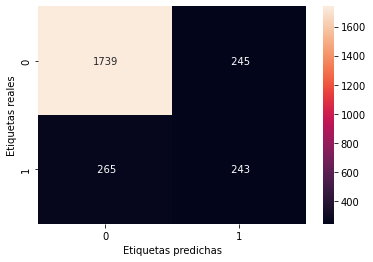

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid_knn), annot=True, fmt='4d')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

In [67]:
print (classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1984
           1       0.50      0.48      0.49       508

    accuracy                           0.80      2492
   macro avg       0.68      0.68      0.68      2492
weighted avg       0.79      0.80      0.79      2492



In [68]:
y_test_pred = model_knn.predict(X_test_scaled)

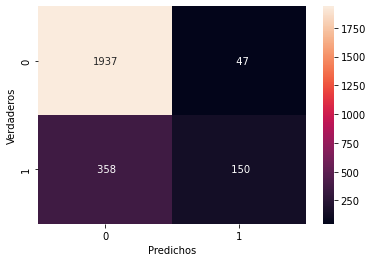

In [69]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

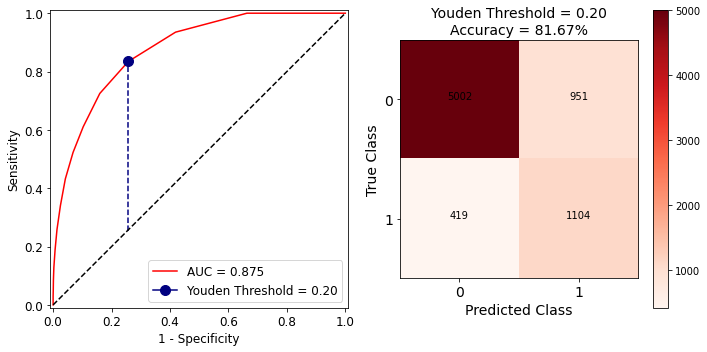

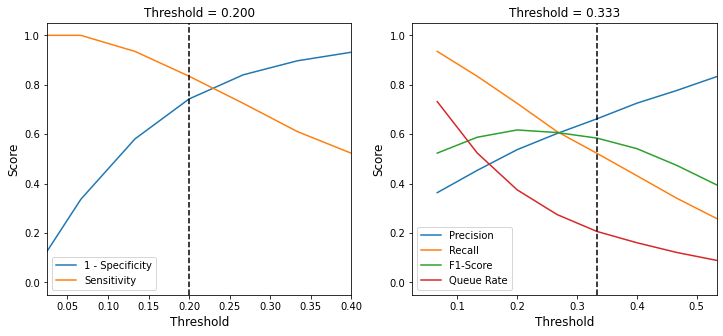

In [70]:
_threshold_finder(model_knn, X_train_scaled, y_train)

In [71]:
umbral_knn = 0.2
probs = model_knn.predict_proba(X_test_scaled)[:,1]
y_test_pred = probs > umbral_knn
accuracy_score(y_test, y_test_pred)

0.7949438202247191

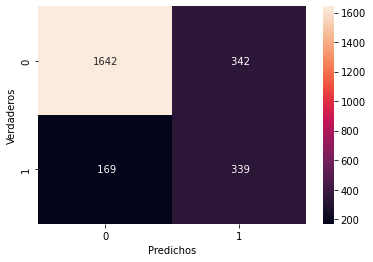

In [72]:
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

### Regresión logística

[Volver a tabla de contenido](#contenido)

#### Uso de `sklearn`

Primeramente usamos la biblioteca de scikit-learn para usar el modelo de regresión logística.

##### Modelo 1

###### **1.1.Selección del hiperparámetro C**

Comenzamos probando distintos valores de C para la regularización del modelo con norma L1, y luego comparamos scores.

In [73]:
from sklearn.model_selection import cross_val_score

def get_best_c(C_values,Xtrain,ytrain,folds):
    scores_c = []
    for c in C_values:
        c_lr = LogisticRegression(penalty='l1', C=c, solver='liblinear')#, class_weight="balanced")
#         The “balanced” mode uses the values of y to automatically 
#         adjust weights inversely proportional to class frequencies in the input data
        scores = cross_val_score(c_lr, Xtrain, ytrain, cv=folds,scoring="f1_micro")
#         The F1 score can be interpreted as a harmonic mean of 
#         the precision and recall, where an F1 score reaches
#         its best value at 1 and worst score at 0.   
        dict_scores = {"C":c,"score_medio":scores.mean(),"score_std":scores.std()}
        scores_c.append(dict_scores)
    df_scores = pd.DataFrame(scores_c)
    return df_scores

In [74]:
get_best_c([10, 1, .1, 0.05,.01,.001,0.5], X_train_scaled, y_train, 5)
# podemos ver que el score_medio más cercano a 1 corresponde a C=0.050
# valores menores de C implican mayor fuerza en la regularización

,C,score_medio,score_std
0,10.000,0.810594,0.004739
1,1.000,0.810862,0.004529
2,0.100,0.811531,0.005578
3,0.050,0.812333,0.004347
4,0.010,0.805779,0.004663
5,0.001,0.796281,0.000309
6,0.500,0.810728,0.004616


###### **1.2. Instanciación del modelo y entrenamiento**

Instanciamos el modelo con regularización y ajustamos los datos de entrenamiento

In [75]:
logistic_regression = LogisticRegression(penalty='l1', solver= 'liblinear', C = 0.050) 
logistic_regression.fit(X_train_scaled, y_train);

Hacemos predicciones con el modelo entrenado

In [76]:
y_train_pred = logistic_regression.predict(X_train_scaled)
# y_test_pred = logistic_regression.predict(X_test_scaled)

###### **1.3 Evaluación del modelo con datos de entrenamiento**

La métrica "accuracy" es aceptable aunque en un problema de "Churn-Modeling" lo que más nos interesa predecir correctamente la precisión y el recall.  

In [77]:
accuracy_score(y_train, y_train_pred)

0.8116639914392724

Elaboramos la matriz de confusión

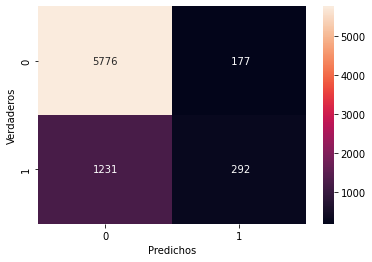

In [78]:
confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [79]:
cm = confusion_matrix(y_train, y_train_pred)
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]
print("La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de ", round(precision_score(y_train, y_train_pred), 2 ), "y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de ", round(recall_score(y_train, y_train_pred),2))

La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de  0.62 y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de  0.19


###### **1.4. Optimización con cambio de umbral**

Realizamos un histograma para poder econtrar un umbral optimo. De la figura vemos que un buen umbral es de 0.25. 

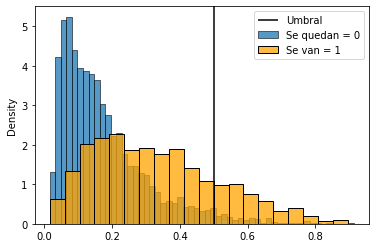

In [80]:
logistic_regression.predict_proba(X_train_scaled[y_train==0])[:,1]
# Histograma de probabilidades
sns.histplot(data = logistic_regression.predict_proba(X_train_scaled[y_train==0])[:,1], stat = 'density')
sns.histplot(data = logistic_regression.predict_proba(X_train_scaled[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'Se quedan = 0', 'Se van = 1'])

Utilizamos ese valor de umbral y comparamos la nuevas metricas.

In [81]:
umbral = 0.25
probs = logistic_regression.predict_proba(X_train_scaled)[:,1]
y_train_pred = probs > umbral
round(accuracy_score(y_train, y_train_pred),2)

0.75

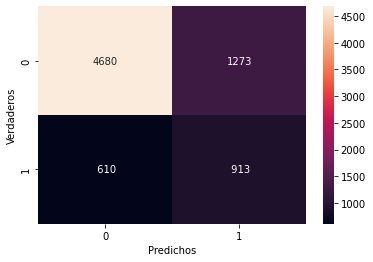

In [82]:
confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [83]:
cm = confusion_matrix(y_train, y_train_pred)
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]
print("La Precisión es de", round(precision_score(y_train, y_train_pred), 2 ), "y el Recall es de", round(recall_score(y_train, y_train_pred),2))

La Precisión es de 0.42 y el Recall es de 0.6


Vemos que la precisión emperó de 62% a un 42% pero el recall mejoró de 19% a 60%. Por lo cual podemos concluir que el umbral de 0.25 es mejor que 0.5.

Si utilizamos índice de Youden para hallar un mejor punto de corte que el hecho "a ojo" obtenemos un umbral de 0.2 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in double_scalars


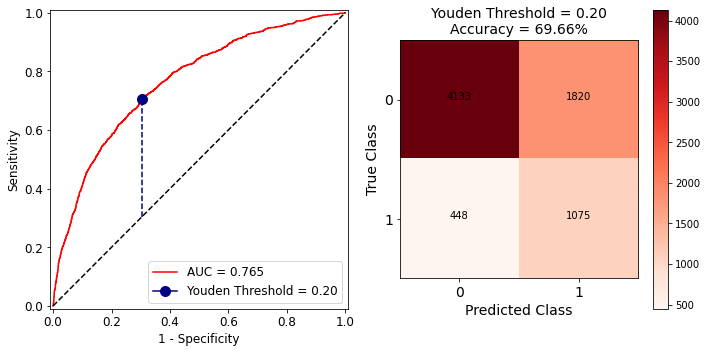

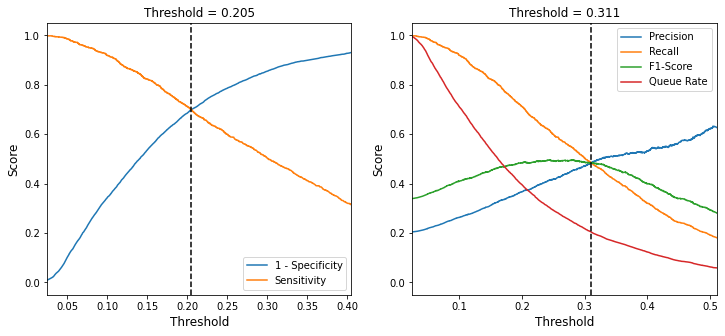

In [84]:
_threshold_finder(logistic_regression, X_train_scaled , y_train)

Cambiamos el umbral y volvemos a calcular las métricas

In [85]:
umbral = 0.2
probs = logistic_regression.predict_proba(X_train_scaled)[:,1]
y_train_pred = probs > umbral
round(accuracy_score(y_train, y_train_pred),2)

0.69

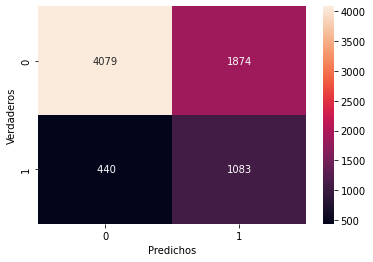

In [86]:
confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [87]:
cm = confusion_matrix(y_train, y_train_pred)
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]
print("La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de ", round(precision_score(y_train, y_train_pred), 2 ), "y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de ", round(recall_score(y_train, y_train_pred),2))

La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de  0.37 y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de  0.71


###### **1.5.Testeo del modelo**

Ahora, con el modelo optimizado, lo evaluamos con los datos de test.

In [88]:
y_test_pred_lr = logistic_regression.predict(X_test_scaled)

In [89]:
# cambiamos el umbral para mejores predicciones de casos positivos
umbral = 0.2
probs = logistic_regression.predict_proba(X_test_scaled)[:,1]
y_test_pred_lr = probs > umbral
round(accuracy_score(y_test, y_test_pred_lr),2)

0.69

In [90]:
y_test_pred_proba_lr = logistic_regression.predict_proba(X_test_scaled)[:,1]

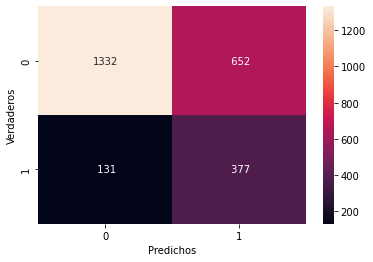

In [91]:
sns.heatmap(confusion_matrix(y_test, y_test_pred_lr), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [92]:
cm = confusion_matrix(y_test, y_test_pred_lr)
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]
print("La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de ", round(precision_score(y_test, y_test_pred), 2 ), "y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de ", round(recall_score(y_test, y_test_pred),2))

La Precisión (donde evaluamos cuán precisos somos cada vez que decimos que una persona se va a ir del banco) es de  0.5 y el Recall (que tan bien indetificamos a las personas que se van a ir del banco) es de  0.67


Vemos que al modificar el umbral, disminuye el accuracy, pero los casos positivos correctamente predichos pasan del 18% al 74%

###### **1.6. Evaluación de métricas**

In [93]:
# Imprimimos un reporte de las principales métricas de evaluación
print(classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1984
           1       0.37      0.74      0.49       508

    accuracy                           0.69      2492
   macro avg       0.64      0.71      0.63      2492
weighted avg       0.80      0.69      0.72      2492



El modelo funciona mejor para la clase negativa que para la positiva. La accuracy del modelo es 0.69. Macro avg es la media de las métricas de evaluación para el total de los casos; vemos que precision=0.64, recall=0.71 y f1=0.63

##### Modelo 2 

###### **2.1. Optimización de hiperparámetros con GridSearch**

Definimos el modelo de logit

In [94]:
lr1 = LogisticRegression()

- Seteamos el rango para pesos de clases
- Especificamos hiperparámetros con sus posibles valores
- Creamos los folds

In [95]:
weights = np.linspace(0.0,0.99,500)

param = {'C':[0.1,0.5,1,10,15,20],'penalty':['l2'],'class_weight':[{0:x,1:1.0-x}for x in weights]}

folds = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)

Hacemos GridSearch para optimizar hiperparámetros y entrenamos el modelo 

In [96]:
# la ejecución demora entre 3-5 min
model1 = GridSearchCV(estimator=lr1,param_grid=param,scoring="f1",cv=folds,return_train_score=True)

model1.fit(X_train_scaled,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.99206412825...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                      

Imprimimos los mejores hiperparametros

In [97]:
print("Best F1 score: ", model1.best_score_)
print("Best Hyperparams: ", model1.best_params_)

Best F1 score:  0.4964085577814338
Best Hyperparams:  {'C': 0.1, 'class_weight': {0: 0.23212424849699398, 1: 0.767875751503006}, 'penalty': 'l2'}


###### **2.2. Instanciación del modelo y entrenamiento**

Creamos el modelo nuevo usando los mejores hiperparams

In [98]:
lr2 = LogisticRegression(class_weight={0: 0.23,1: 0.77}, C=0.1, solver='newton-cg')
lr2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, class_weight={0: 0.23, 1: 0.77}, solver='newton-cg')

In [99]:
y_pred_proba_lr2_train = lr2.predict_proba(X_train_scaled)[:,1]
y_pred_lr2_train = lr2.predict(X_train_scaled)

Matriz de confusión entre los valores reales y predichos para el conjunto de datos de train

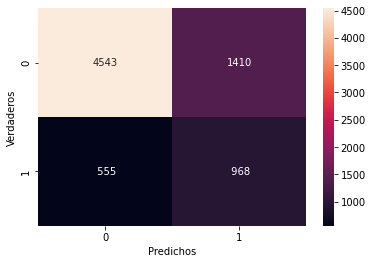

In [100]:
sns.heatmap(confusion_matrix(y_train,y_pred_lr2_train),annot=True,fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [101]:
accuracy_score(y_train,y_pred_lr2_train)

0.7371589085072231

###### **2.3. Testeo del modelo optimizado**

In [102]:
# predecimos probabilidades en test y tomamos 
# prob para la clase positiva 1([:,1])
y_pred_proba_lr2 = lr2.predict_proba(X_test_scaled)[:,1]
y_pred_lr2_test = lr2.predict(X_test_scaled)

Matriz de confusión entre los valores reales y predichos para el conjunto de datos de test

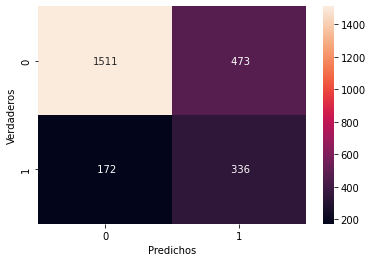

In [103]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr2_test),annot=True,fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

###### **2.4. Evaluación de métricas**

Imprimimos un reporte de las principales métricas de evaluación

In [104]:
print(classification_report(y_test,y_pred_lr2_test))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1984
           1       0.42      0.66      0.51       508

    accuracy                           0.74      2492
   macro avg       0.66      0.71      0.67      2492
weighted avg       0.80      0.74      0.76      2492



El modelo funciona mejor para la clase negativa que para la positiva. La accuracy del modelo es 0.74. Macro avg es la media de las métricas de evaluación para el total de los casos; vemos que precision=0.66, recall=0.71 y f1=0.67

##### Comparación de modelos de Regresión Logística con ROC y AUC

ROC para el Modelo 1

In [105]:
fpr_log1,tpr_log1,thr_log1 = roc_curve(y_test,y_test_pred_proba_lr)

ROC para el Modelo 2

In [106]:
fpr_log2,tpr_log2,thr_log2 = roc_curve(y_test,y_pred_proba_lr2)

AUC para el modelo 1

In [107]:
auc_lr1 = auc(fpr_log1,tpr_log1)
auc_lr1

0.7716039338328676

AUC para el modelo 2

In [108]:
auc_lr2 = auc(fpr_log2,tpr_log2)
auc_lr2

0.7764646701168403

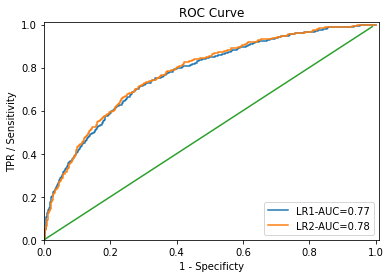

In [109]:
df1 = pd.DataFrame(dict(fpr=fpr_log1,tpr=tpr_log1,thr=thr_log1))
df2 = pd.DataFrame(dict(fpr=fpr_log2,tpr=tpr_log2,thr=thr_log2))


plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty'); plt.ylabel('TPR / Sensitivity'); plt.title('ROC Curve')
plt.plot(df1['fpr'],df1['tpr'],label="LR1-AUC="+format(round(auc_lr1,2)))
plt.plot(df2['fpr'],df2['tpr'],label="LR2-AUC="+format(round(auc_lr2,2)))
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(loc="lower right")
plt.show()

#### Uso de `statsmodels`

In [110]:
X_train_stats = sm.add_constant(X_train_scaled)

In [111]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_Yes', 'IsActiveMember_Yes'],
      dtype='object')

In [112]:
# Instanciamos la clase
logit = sm.Logit(y_train, X_train_stats)
# Fiteamos el modelo
result = logit.fit()
# Imprimimos el resumen
print(result.summary2(xname=['const','CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_Germany', 'Geography_Spain',
       'Gender_Male', 'HasCrCard_Yes', 'IsActiveMember_Yes']))

Optimization terminated successfully.
         Current function value: 0.429585
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.150      
Dependent Variable:  Exited           AIC:              6447.1529  
Date:                2022-03-22 11:54 BIC:              6530.1863  
No. Observations:    7476             Log-Likelihood:   -3211.6    
Df Model:            11               LL-Null:          -3779.2    
Df Residuals:        7464             LLR p-value:      1.4155e-236
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      6.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.6475   0.0356 -46.2619 0.0000 -1.7173 -1.5777
CreditScore        -0.0522   0.0313  -1.6

El coeficiente estimado para **CreditScore**, dividido el error estándar devuelve un z menor a 2, por lo que el valor estimado no es estadísticamente significativo, lo cual se confirma con un valor grande de p.
**Age** tiene una relación positiva con la posibilidad de darse de baja en el banco. Por cada año de edad ganado, el log(odds) se incrementa en 0.7451. El z de Age indica que el coeficiente estimado está a 24 desvíos de 0 en una curva normal estándar, por lo que el valor estimado es estadísticamente significativo.
**Tenure** tiene un p-value>0.05, por lo que no se considera est. significativo, lo mismo sucede con **NumOfProducts**, **EstimatedSalary**, **Geography_Spain** y **HasCrCard_Yes**.
**Balance** tiene una relación positiva con la posibilidad de darse de baja en el banco. El z del coeficiente estimado para esa variable se encuentra a mas de 4 desvíos estándar de 0 en una curva normal estándar, por lo que es est.significativo. Por cada unidad de incremento de Balance, el log(odds) aumenta en 0.1706.
**Geography_Germany** tiene una relación positiva con la posibilidad de darse de baja en el banco. Es un log(odds-ratio) que indica, en una escala logarítmica, qué tanto el hecho que el cliente sea alemán aumenta o disminuye los odds de darse de baja.
**IsActiveMember_Yes** y **Gender_Male** tienen una relación negativa con la potencial salida del banco. Los valores de p son <0.05, por lo que estos coeficientes son est. significativos.
El **intercepto** indica que si todos los predictores valieran 0 (algo muy poco problable o imposible), el log(odds) tomaría el valor de -1.6475.

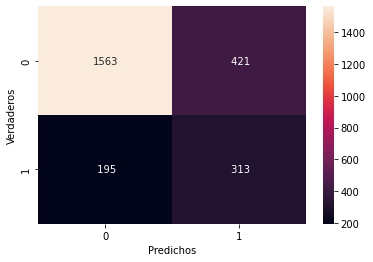

In [113]:
#Hagamos predicciones
X_test_stats = sm.add_constant(scaler.transform(X_test))
# Obtenemos las probabilidades y las comparamos con 0.5 
y_pred_stats = result.predict(X_test_stats) > 0.25
# Generamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_stats), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [114]:
# Calculamos el accuracy
print("Accuracy =", accuracy_score(y_test, y_pred_stats))
cm = confusion_matrix(y_test,  y_pred_stats)
TP = cm[0,0]
FN = cm[0,1]
FP = cm[1,0]
TN = cm[1,1]
print("La Precisión es de", round(precision_score(y_test, y_pred_stats), 2 ), "y el Recall es de", round(recall_score(y_test, y_pred_stats),2))

Accuracy = 0.7528089887640449
La Precisión es de 0.43 y el Recall es de 0.62


### Naive Bayes

[Volver a tabla de contenido](#contenido)

Se implementó Naive Bayes para realizar la clasificación de los usuarios según si se retira o no del banco. Se utilizó una distribución Bernoulli debido a la naturaleza de la variable de interés la cual es churn (retiro o no retiro) 

In [115]:
# Definición del modelo de Naive Bayes Bernoulli
gnb = BernoulliNB()
gnb.fit(X_train_scaled, y_train)
Y_pred = gnb.predict(X_test_scaled)

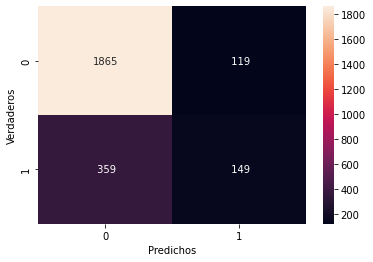

In [116]:
# Matriz de confusión
confusion_matrix(y_test, Y_pred)
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [117]:
# Accuracy de modelo con set de prueba
print('Accuracy en el set de Test: {:.2f}'
     .format(round(accuracy_score(y_test, Y_pred), 2)))

# Recall de modelo con set de prueba
print('Recall en el set de Test: {:.2f}'
     .format(round(recall_score(y_test, Y_pred), 2)))

# Precisión de modelo con set de prueba
print('Precisión en el set de Test: {:.2f}'
     .format(round(precision_score(y_test, Y_pred), 2)))


Accuracy en el set de Test: 0.81
Recall en el set de Test: 0.29
Precisión en el set de Test: 0.56


Se utilizó el Índice de Youden, para determinar el punto de corte óptimo que maximice sensibilidad y especificidad en la clasificación

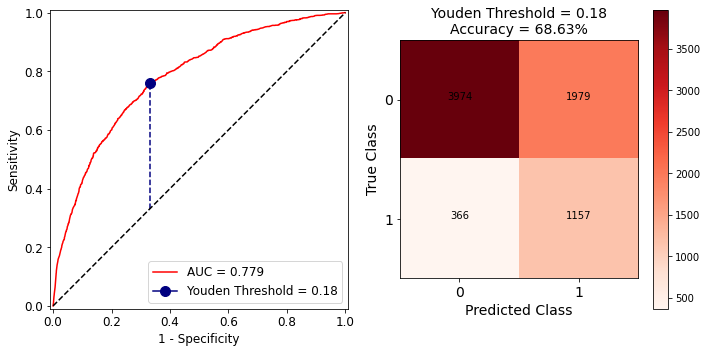

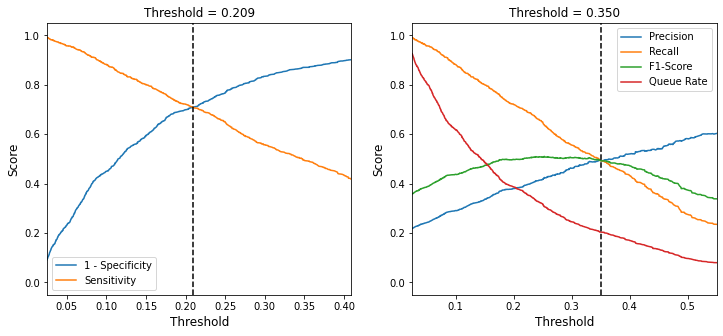

In [118]:
_threshold_finder(gnb, X_train_scaled , y_train)

De acuerdo al Índice de Youden, se determinó 0,18 como punto de corte óptimo, con el cual se realizó de nuevo la clasificación de los datos

In [119]:
# Nueva clasificación según nuevo umbral
umbral = 0.18
probs = gnb.predict_proba(X_test_scaled)[:,1]
y_test_pred_gnb = probs > umbral

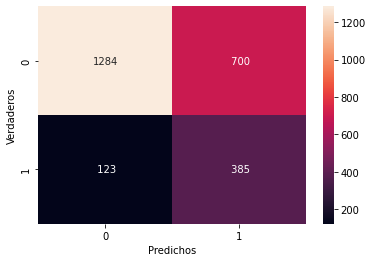

In [120]:
# Nueva matriz de confusión
confusion_matrix(y_test, y_test_pred_gnb)
sns.heatmap(confusion_matrix(y_test, y_test_pred_gnb), annot=True, fmt='4d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [121]:
# Accuracy de modelo con set de prueba
print('Accuracy en el set de Test: {:.2f}'
     .format(round(accuracy_score(y_test, y_test_pred_gnb), 2)))

# Recall de modelo con set de prueba
print('Recall en el set de Test: {:.2f}'
     .format(round(recall_score(y_test, y_test_pred_gnb), 2)))

# Precisión de modelo con set de prueba
print('Precisión en el set de Test: {:.2f}'
     .format(round(precision_score(y_test, y_test_pred_gnb), 2)))

Accuracy en el set de Test: 0.67
Recall en el set de Test: 0.76
Precisión en el set de Test: 0.35


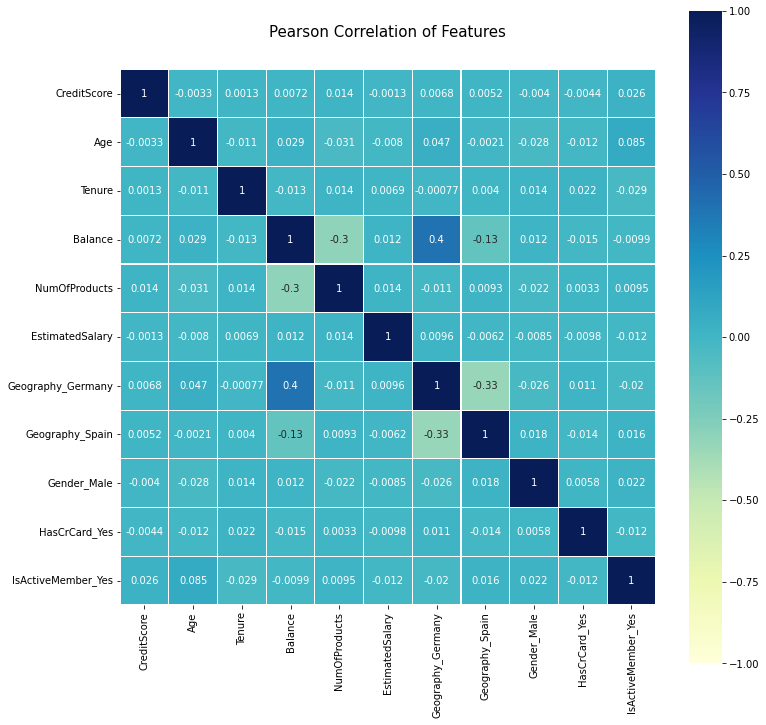

In [136]:
# Correlación entre covariables del modelo
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, vmin=-1, square=True, cmap="YlGnBu", linecolor='white', annot=True)

<a id="section_Evaluacion_de_modelos"></a>
## 4. Evaluación de los modelos

[Volver a tabla de contenido](#contenido)

Con la finalidad de evaluar los tres modelos de clasificación utilizados: KNN, regresión logística y Naive Bayes, y seleccionar el de mejor desempeño, se realizaron las curvas ROC y se compararon sus respectivos AUC. 

Primero generamos las predicciones de los tres modelos (gnb= Naive Bayes, lr= regresión logística, knn=KNN)

In [123]:
Y_gnb_score = gnb.predict_proba(X_test_scaled)
# Y_lr_score = logistic_regression.decision_function(X_test_scaled)
Y_lr_score = lr2.decision_function(X_test_scaled)
Y_knn_score = model_knn.predict_proba(X_test_scaled)

Luego determinamos de la tasa de falsos positivos (fpr), verdaderos positivos (tpr) y la AUC 

In [124]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, Y_gnb_score[:, 1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, Y_lr_score)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, Y_knn_score[:, 1])
auc_gnb=auc(fpr_gnb, tpr_gnb)
auc_lr=auc(fpr_lr, tpr_lr)
auc_knn=auc(fpr_knn, tpr_knn)

Ya con estas variables generadas, confeccionamos las curvas ROC.

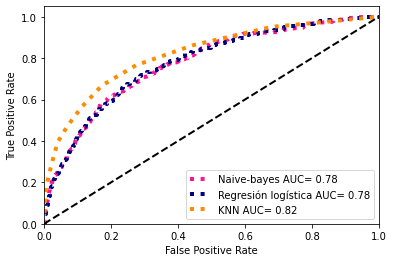

In [125]:
lw=2
plt.figure()
plt.plot(fpr_gnb,tpr_gnb ,
         label='Naive-bayes' + ' AUC= ' + format(round(auc_gnb,2)),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr_lr, tpr_lr,
         label='Regresión logística' + ' AUC= ' + format(round(auc_lr,2)),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr_knn, tpr_knn,
         label='KNN' + ' AUC= ' + format(round(auc_knn,2)),
         color='darkorange', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Comparamos las diferentes métricas para los tres modelos. Vemos que los tres modelos presentan valores similares en las métricas de interés aunque en modelo de KNN obtuvo los valores más altos en todas. 

In [126]:
metricas = pd.DataFrame()
columnas = ["KNN", "Reg Logistica", "Naive Bayes"]
filas = ['Accuracy', 'Recall', 'Precisión']

metricas = pd.DataFrame(columns=columnas, index=filas)
metricas.loc['Accuracy',"KNN"] = format(round(accuracy_score(y_test, y_test_pred), 2))
metricas.loc['Recall',"KNN"] = format(round(recall_score(y_test, y_test_pred), 2))
metricas.loc['Precisión',"KNN"] = format(round(precision_score(y_test, y_test_pred), 2))
metricas.loc['Accuracy',"Reg Logistica"] = format(round(accuracy_score(y_test, y_pred_lr2_test), 2))
metricas.loc['Recall',"Reg Logistica"] = format(round(recall_score(y_test, y_pred_lr2_test), 2))
metricas.loc['Precisión',"Reg Logistica"] = format(round(precision_score(y_test, y_pred_lr2_test), 2))
metricas.loc['Accuracy',"Naive Bayes"] = format(round(accuracy_score(y_test, y_test_pred_gnb), 2))
metricas.loc['Recall',"Naive Bayes"] = format(round(recall_score(y_test, y_test_pred_gnb), 2))
metricas.loc['Precisión',"Naive Bayes"] = format(round(precision_score(y_test, y_test_pred_gnb), 2))

metricas

,KNN,Reg Logistica,Naive Bayes
Accuracy,0.79,0.74,0.67
Recall,0.67,0.66,0.76
Precisión,0.5,0.42,0.35


<a id="section_Conclusiones"></a>
## 5. Conclusiones


[Volver a tabla de contenido](#contenido)

En este desafío se trabajó con un data set de Churn-Modeling. Nuestro objetivo era ajustar estos datos con tres modelos de clasificación diferentes: KNN, Regresión Logística y Naive Bayes.
Con los tres modelos obtuvimos buenos resultados pero con KNN tanto las métricas elegidas para su análisis ('Accuracy', 'Recall' y 'Precisión') con el valor de AUC fueron mejores.
Por lo tanto, consideramos que el mejor modelo para este data set fue el desarrollado con KNN.